<a href="https://colab.research.google.com/github/vikadenisova/mirea_ml/blob/main/ml_lab2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified
Эпоха 1 завершилась с функцией стоимости на последнем пакете = 1.5549540519714355
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 1.2798521518707275
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 1.225773811340332
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 1.0272800922393799
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 1.132739543914795
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 1.259055256843567
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 0.7965665459632874
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 0.828451931476593
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 0.9407839775085449
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.8624622225761414
Эпоха 11 завершилась с функцией стоимости на последнем пакете = 0.7499526739120483
Эпоха 12 завершилась с ф

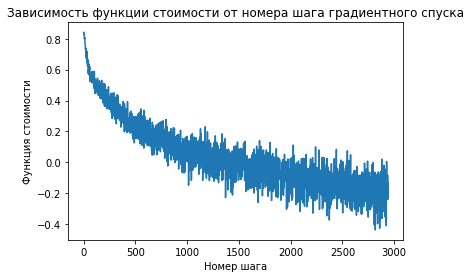

In [ ]:
# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# В этой части предлагается реализовать сверточную сеть.
# Поэкспериментируйте с использованием слоев пакетной нормализации и дропаута.
# Сравните точность на тестовой выборке с аналогичными результатами одногруппников.

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32,10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out



# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 15
BATCH_SIZE = 256

# Загружаем данные из набора CIFAR10
train_data = datasets.CIFAR10(root='./data/train', train=True, download=True, transform=ToTensor())
test_data = datasets.CIFAR10(root='./data/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Готовимся к обучению
model = ConvNet().to(device)  # создаем модель
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
        # Нужно реализовать один шаг градиентного спуска
        #batch = batch.reshape(batch.shape[0], -1)
        optimizer.zero_grad()
        loss = loss_function(model(batch), labels) # значение функции стоимости на пакете, нужно рассчитать
        loss.backward()
        optimizer.step() 
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')


# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

torch.save(model, 'CNN.pth')

In [ ]:
model = torch.load('CNN.pth')

In [ ]:
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions.cpu()))

Точность (accuracy) на тестовой выборке: 0.6632
